# Diabetes Analysis —  BY: MOHAMMAD OTAIBI


**Contents:** Data load → Preprocessing → Feature engineering → Modeling → Evaluation.


In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [163]:
df=pd.read_csv('/content/diabetes_prediction_dataset.csv')
df.head(100)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
95,Male,19.0,0,0,never,27.32,6.1,80,0
96,Female,67.0,0,0,never,27.32,6.2,159,1
97,Male,11.0,0,0,No Info,27.32,6.1,90,0
98,Female,30.0,0,0,No Info,50.13,6.0,100,0


In [164]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [165]:
df.shape

(100000, 9)

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [167]:
#---------DATA PREPARATION-------

In [168]:
# Checking if there is a missing values:
df.isnull().sum()  #No missing values

,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,0
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0


In [169]:
# Checking if there is any duplicated values:
df.loc[df.duplicated(subset=[
    'diabetes',
    'blood_glucose_level',
    'HbA1c_level',
    'bmi',
    'smoking_history',
    'heart_disease',
    'hypertension',
    'age',
    'gender'
])]
# there is 3854 duplicated row

#IMPORTANT NOTE: Since we don't have the "ID" OR The "Name of each patient" , we will ignore dropping Duplicated value Untill Now.

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
2756,Male,80.0,0,0,No Info,27.32,6.6,159,0
3272,Female,80.0,0,0,No Info,27.32,3.5,80,0
3418,Female,19.0,0,0,No Info,27.32,6.5,100,0
3939,Female,78.0,1,0,former,27.32,3.5,130,0
3960,Male,47.0,0,0,No Info,27.32,6.0,200,0
...,...,...,...,...,...,...,...,...,...
99980,Female,52.0,0,0,never,27.32,6.1,145,0
99985,Male,25.0,0,0,No Info,27.32,5.8,145,0
99989,Female,26.0,0,0,No Info,27.32,5.0,158,0
99990,Male,39.0,0,0,No Info,27.32,6.1,100,0


In [170]:
duplicated_rows = df[df.duplicated(subset=[
    'diabetes',
    'blood_glucose_level',
    'HbA1c_level',
    'bmi',
    'smoking_history',
    'heart_disease',
    'hypertension',
    'age',
    'gender'
], keep=False)]

# Grouping
grouped = duplicated_rows.groupby([
    'diabetes',
    'blood_glucose_level',
    'HbA1c_level',
    'bmi',
    'smoking_history',
    'heart_disease',
    'hypertension',
    'age',
    'gender'
])

# To see the first two duplicated rows
for _, group in grouped:
    if len(group) > 1:
        print(group)
        break

      gender   age  hypertension  heart_disease smoking_history    bmi  \
10202   Male  13.0             0              0         No Info  27.32   
30407   Male  13.0             0              0         No Info  27.32   

       HbA1c_level  blood_glucose_level  diabetes  
10202          3.5                   80         0  
30407          3.5                   80         0  


In [171]:
df = df.drop_duplicates(subset=[
    'diabetes',
    'blood_glucose_level',
    'HbA1c_level',
    'bmi',
    'smoking_history',
    'heart_disease',
    'hypertension',
    'age',
    'gender'
], keep='first')  # keep the first copy

In [172]:
print(df)

       gender   age  hypertension  heart_disease smoking_history    bmi  \
0      Female  80.0             0              1           never  25.19   
1      Female  54.0             0              0         No Info  27.32   
2        Male  28.0             0              0           never  27.32   
3      Female  36.0             0              0         current  23.45   
4        Male  76.0             1              1         current  20.14   
...       ...   ...           ...            ...             ...    ...   
99994  Female  36.0             0              0         No Info  24.60   
99996  Female   2.0             0              0         No Info  17.37   
99997    Male  66.0             0              0          former  27.83   
99998  Female  24.0             0              0           never  35.42   
99999  Female  57.0             0              0         current  22.43   

       HbA1c_level  blood_glucose_level  diabetes  
0              6.6                  140        

In [173]:
df['bmi'].nunique()

4247

In [174]:
df['bmi'].value_counts().head()   # NOT POSSIBLE !!


,count
bmi,
27.32,21666
23.00,103
27.12,101
27.80,100
24.96,100


<Axes: xlabel='bmi'>

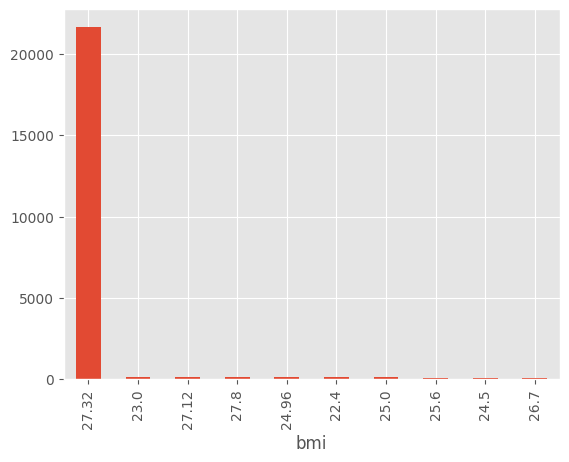

In [175]:
df['bmi'].value_counts().head(10).plot(kind='bar')

In [176]:
#__________________________________________________To deal with duplicate BMI values______________________________________________________________________________

In [177]:
# Replace 27.32 value with NaN
df['bmi'] = df['bmi'].replace(27.32, np.nan)

In [178]:
df.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,0
bmi,21666
HbA1c_level,0
blood_glucose_level,0
diabetes,0


In [179]:
df_known_bmi = df[df['bmi'].notna()]
df_known_bmi.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
6,Female,44.0,0,0,never,19.31,6.5,200,1
7,Female,79.0,0,0,No Info,23.86,5.7,85,0


<Axes: xlabel='diabetes', ylabel='bmi'>

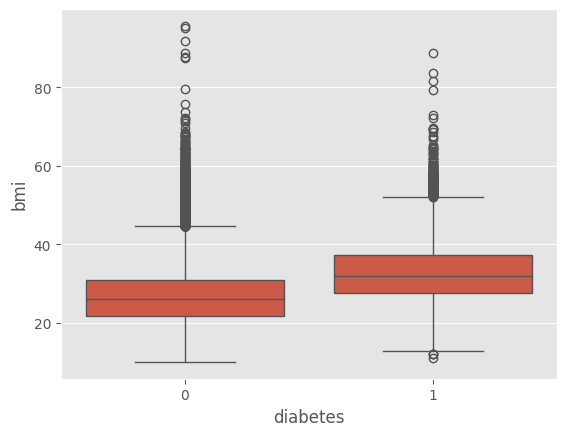

In [180]:
sns.boxplot(data=df_known_bmi, x='diabetes', y='bmi')

/tmp/ipython-input-181-2892704558.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df['diabetes'] == 0]['bmi'], label='No Diabetes', shade=True)
/tmp/ipython-input-181-2892704558.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df['diabetes'] == 1]['bmi'], label='Has Diabetes', shade=True)


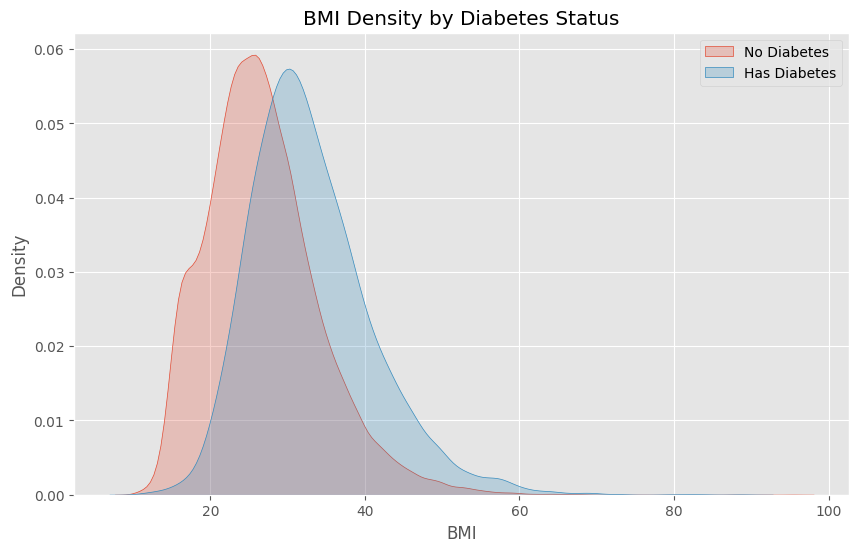

In [181]:
plt.figure(figsize=(10, 6))

sns.kdeplot(data=df[df['diabetes'] == 0]['bmi'], label='No Diabetes', shade=True)
sns.kdeplot(data=df[df['diabetes'] == 1]['bmi'], label='Has Diabetes', shade=True)

plt.title('BMI Density by Diabetes Status')
plt.xlabel('BMI')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

In [182]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

#df=pd.read_csv('/content/diabetes_prediction_dataset.csv')
#df['bmi'] = df['bmi'].replace(27.32, np.nan)

# Step 3: Flag rows with missing BMI (optional)
df['bmi_was_missing'] = df['bmi'].isna().astype(int)


df_unknown_bmi = df[df['bmi'].isna()]

# Step 5: Select features for prediction
features = ['age', 'gender', 'smoking_history', 'blood_glucose_level', 'HbA1c_level', 'heart_disease', 'hypertension']

# Step 6: Encode categorical variables
encoded_df = df.copy()
label_encoders = {}

for col in ['gender', 'smoking_history']:
    le = LabelEncoder()
    encoded_df[col] = le.fit_transform(encoded_df[col].astype(str))
    label_encoders[col] = le

# Step 7: Prepare training and prediction sets
X_known = encoded_df.loc[df_known_bmi.index, features]
y_known = encoded_df.loc[df_known_bmi.index, 'bmi']
X_unknown = encoded_df.loc[df_unknown_bmi.index, features]

# Step 8: Train the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_known, y_known)

# Step 9: Predict missing BMI values
predicted_bmi = model.predict(X_unknown)

# Step 10: Fill the missing BMI values
df.loc[df['bmi'].isna(), 'bmi'] = predicted_bmi

# Step 11: Confirm result
print("Remaining missing BMI values:", df['bmi'].isna().sum())

Remaining missing BMI values: 0


In [183]:
df.head(100)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,bmi_was_missing
0,Female,80.0,0,1,never,25.190000,6.6,140,0,0
1,Female,54.0,0,0,No Info,29.695824,6.6,80,0,1
2,Male,28.0,0,0,never,27.331197,5.7,158,0,1
3,Female,36.0,0,0,current,23.450000,5.0,155,0,0
4,Male,76.0,1,1,current,20.140000,4.8,155,0,0
...,...,...,...,...,...,...,...,...,...,...
95,Male,19.0,0,0,never,21.744103,6.1,80,0,1
96,Female,67.0,0,0,never,26.073045,6.2,159,1,1
97,Male,11.0,0,0,No Info,21.530795,6.1,90,0,1
98,Female,30.0,0,0,No Info,50.130000,6.0,100,0,0


In [184]:
df['smoking_history'].value_counts()

,count
smoking_history,
never,34398
No Info,32887
former,9299
current,9197
not current,6367
ever,3998


عدد الصفوف بعد حذف 'No Info' من smoking_history: 63259


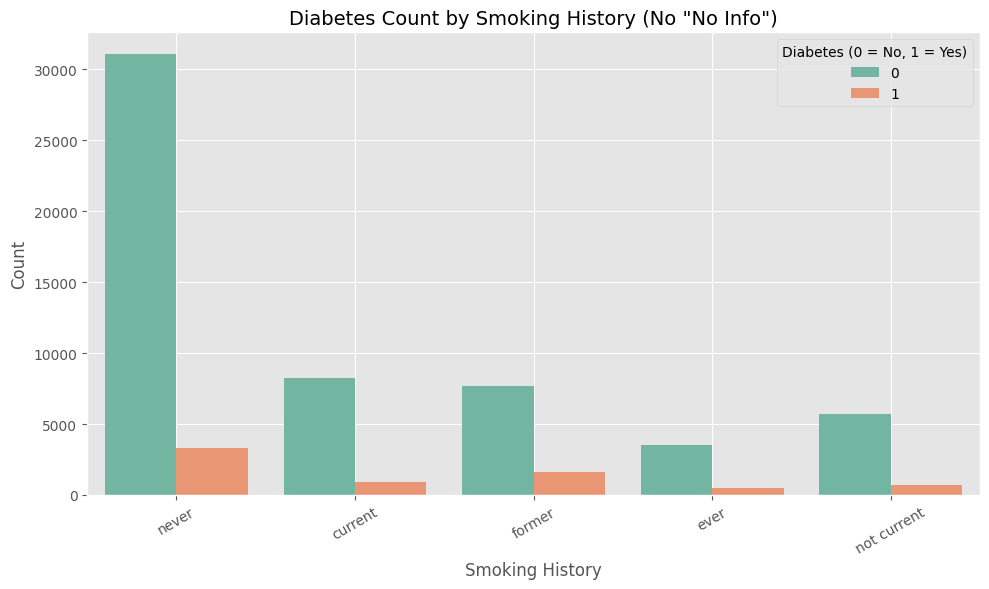

In [ ]:
df_smoke_clean = df[df['smoking_history'] != 'No Info']

print(f"عدد الصفوف بعد حذف 'No Info' من smoking_history: {df_smoke_clean.shape[0]}")

# countplot
plt.figure(figsize=(10, 6))
sns.countplot(data=df_smoke_clean, x='smoking_history', hue='diabetes', palette='Set2')

plt.title('Diabetes Count by Smoking History (No "No Info")', fontsize=14)
plt.xlabel('Smoking History', fontsize=12)
plt.ylabel('Count')
plt.xticks(rotation=30)
plt.legend(title='Diabetes (0 = No, 1 = Yes)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Get rid of "No Info"
valid_smoking = df[df['smoking_history'] != 'No Info']['smoking_history']

probabilities = valid_smoking.value_counts(normalize=True)

mask_no_info = df['smoking_history'] == 'No Info'

np.random.seed(42)  
df.loc[mask_no_info, 'smoking_history'] = np.random.choice(
    probabilities.index,
    size=mask_no_info.sum(),
    p=probabilities.values
)

df['smoking_history'].value_counts()

,count
smoking_history,
never,52309
former,14174
current,13957
not current,9614
ever,6092


In [187]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,bmi_was_missing
0,Female,80.0,0,1,never,25.190000,6.6,140,0,0
1,Female,54.0,0,0,never,29.695824,6.6,80,0,1
2,Male,28.0,0,0,never,27.331197,5.7,158,0,1
3,Female,36.0,0,0,current,23.450000,5.0,155,0,0
4,Male,76.0,1,1,current,20.140000,4.8,155,0,0


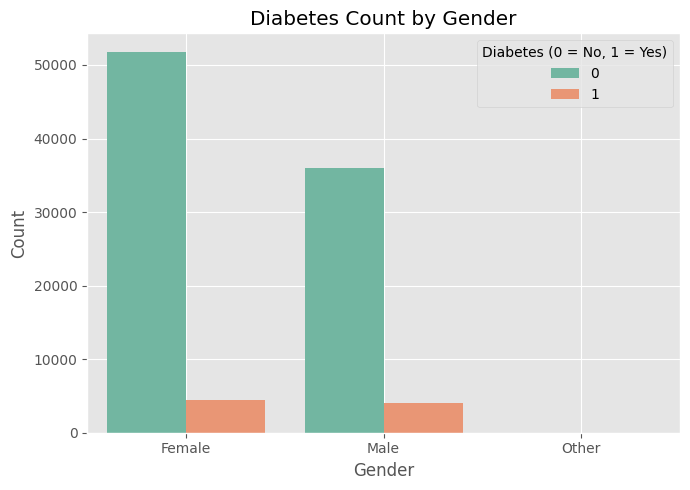

In [188]:
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='gender', hue='diabetes', palette='Set2')

plt.title('Diabetes Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Diabetes (0 = No, 1 = Yes)')
plt.grid(True)
plt.tight_layout()
plt.show()  #contributing factor

In [189]:
ct = pd.crosstab(df['gender'], df['diabetes'])
ct_percent = pd.crosstab(df['gender'], df['diabetes'], normalize='index') * 100

# Combine counts and percentages into one string
result = ' (' + ct_percent.round(1).astype(str) + '%)'
print(result)


diabetes          0         1
gender                       
Female      (92.1%)    (7.9%)
Male        (89.9%)   (10.1%)
Other      (100.0%)    (0.0%)


In [190]:
df = df.drop('gender', axis=1)

/tmp/ipython-input-191-551514639.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='diabetes', y='age', palette='Set2')


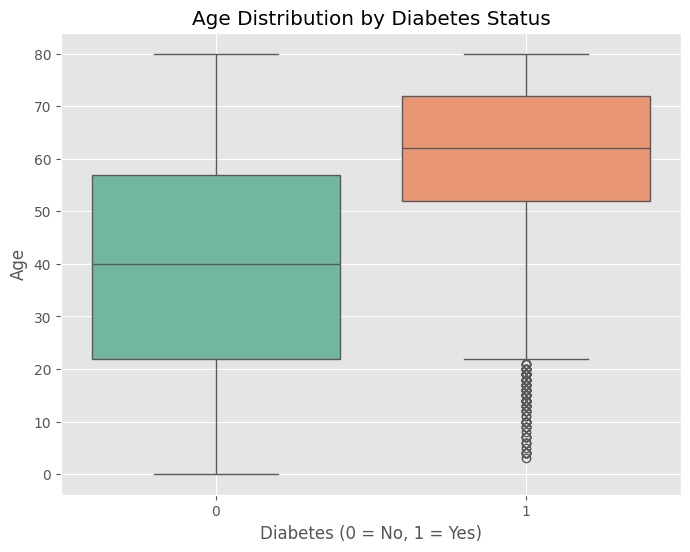

In [191]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='diabetes', y='age', palette='Set2')

plt.title('Age Distribution by Diabetes Status')
plt.xlabel('Diabetes (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.grid(True)
plt.show()

In [192]:
df['hypertension'].value_counts()

,count
hypertension,
0,88685
1,7461


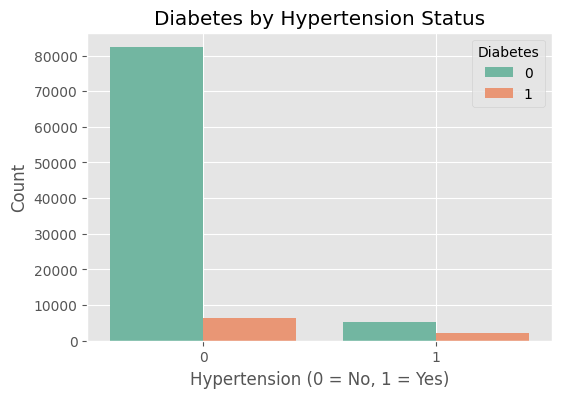

In [193]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='hypertension', hue='diabetes', palette='Set2')

plt.title('Diabetes by Hypertension Status')
plt.xlabel('Hypertension (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.legend(title='Diabetes')
plt.grid(True)
plt.show()


In [194]:
contingency_table = pd.crosstab(df['hypertension'], df['diabetes'])
print(contingency_table)

diabetes          0     1
hypertension             
0             82289  6396
1              5375  2086


In [195]:
ct = pd.crosstab(df['hypertension'], df['diabetes'])
ct_percent = pd.crosstab(df['hypertension'], df['diabetes'], normalize='index') * 100

# Combine counts and percentages into one string
result = ' (' + ct_percent.round(1).astype(str) + '%)'
print(result)


diabetes             0         1
hypertension                    
0              (92.8%)    (7.2%)
1              (72.0%)   (28.0%)


In [196]:
df['heart_disease'].value_counts()

,count
heart_disease,
0,92223
1,3923


In [197]:
contingency_table_hd = pd.crosstab(df['heart_disease'], df['diabetes'])
print(contingency_table_hd)

diabetes           0     1
heart_disease             
0              85008  7215
1               2656  1267


In [198]:
ct = pd.crosstab(df['heart_disease'], df['diabetes'])
ct_percent = pd.crosstab(df['heart_disease'], df['diabetes'], normalize='index') * 100

# Combine percentages
result = ' (' + ct_percent.round(1).astype(str) + '%)'
print(result)

diabetes              0         1
heart_disease                    
0               (92.2%)    (7.8%)
1               (67.7%)   (32.3%)


In [199]:
df['HbA1c_level'].value_counts()

,count
HbA1c_level,
6.6,8164
5.7,8124
6.5,8051
5.8,7992
6.0,7988
6.2,7958
6.1,7716
3.5,7319
4.8,7296


/tmp/ipython-input-200-238398728.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='diabetes', y='HbA1c_level', palette='Set2')


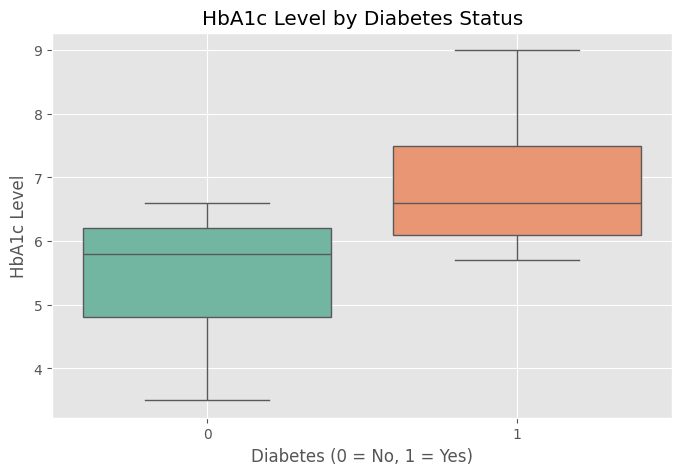

In [200]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='diabetes', y='HbA1c_level', palette='Set2')

plt.title('HbA1c Level by Diabetes Status')
plt.xlabel('Diabetes (0 = No, 1 = Yes)')
plt.ylabel('HbA1c Level')
plt.grid(True)
plt.show()

In [201]:
df['blood_glucose_level'].value_counts()

,count
blood_glucose_level,
159,7478
130,7471
126,7421
140,7416
160,7397
145,7371
200,7290
155,7285
90,6822


/tmp/ipython-input-202-3710938764.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='diabetes', y='blood_glucose_level', palette='Set2')


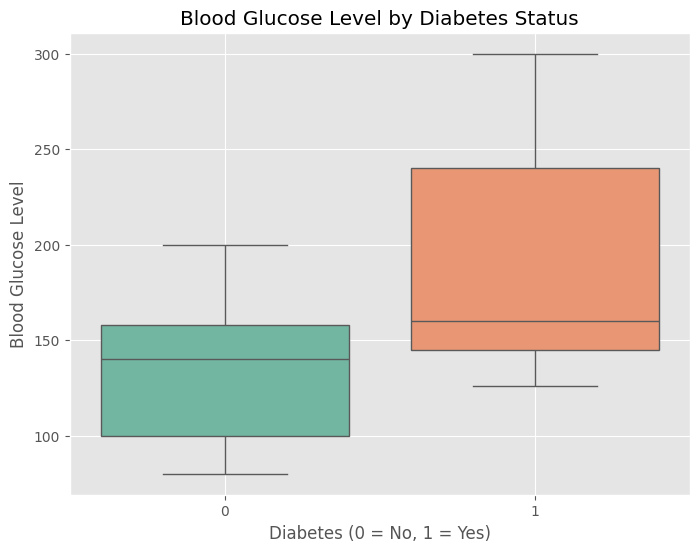

In [202]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='diabetes', y='blood_glucose_level', palette='Set2')

plt.title('Blood Glucose Level by Diabetes Status')
plt.xlabel('Diabetes (0 = No, 1 = Yes)')
plt.ylabel('Blood Glucose Level')
plt.grid(True)
plt.show()

In [203]:
#------------------------------------------------------------------------------

In [204]:
df


,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,bmi_was_missing
0,80.0,0,1,never,25.190000,6.6,140,0,0
1,54.0,0,0,never,29.695824,6.6,80,0,1
2,28.0,0,0,never,27.331197,5.7,158,0,1
3,36.0,0,0,current,23.450000,5.0,155,0,0
4,76.0,1,1,current,20.140000,4.8,155,0,0
...,...,...,...,...,...,...,...,...,...
99994,36.0,0,0,not current,24.600000,4.8,145,0,0
99996,2.0,0,0,former,17.370000,6.5,100,0,0
99997,66.0,0,0,former,27.830000,5.7,155,0,0
99998,24.0,0,0,never,35.420000,4.0,100,0,0


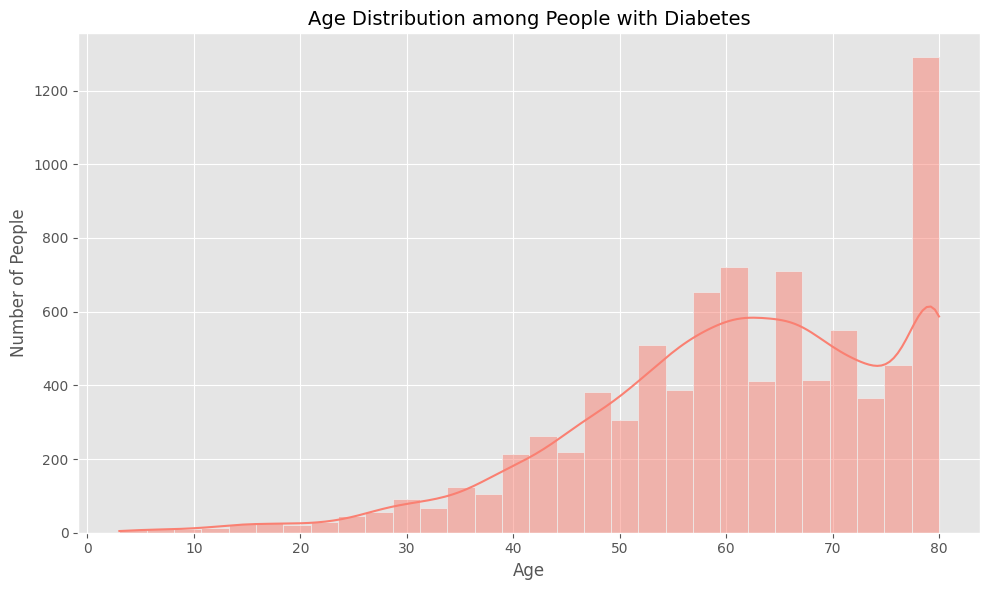

In [205]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter diabetic patients using query
diabetic_df = df.query("diabetes == 1")

# Set up the plot
plt.figure(figsize=(10, 6))
sns.histplot(data=diabetic_df, x='age', bins=30, kde=True, color='salmon')

# Add labels and title
plt.title('Age Distribution among People with Diabetes', fontsize=14)
plt.xlabel('Age')
plt.ylabel('Number of People')
plt.grid(True)
plt.tight_layout()
plt.show()


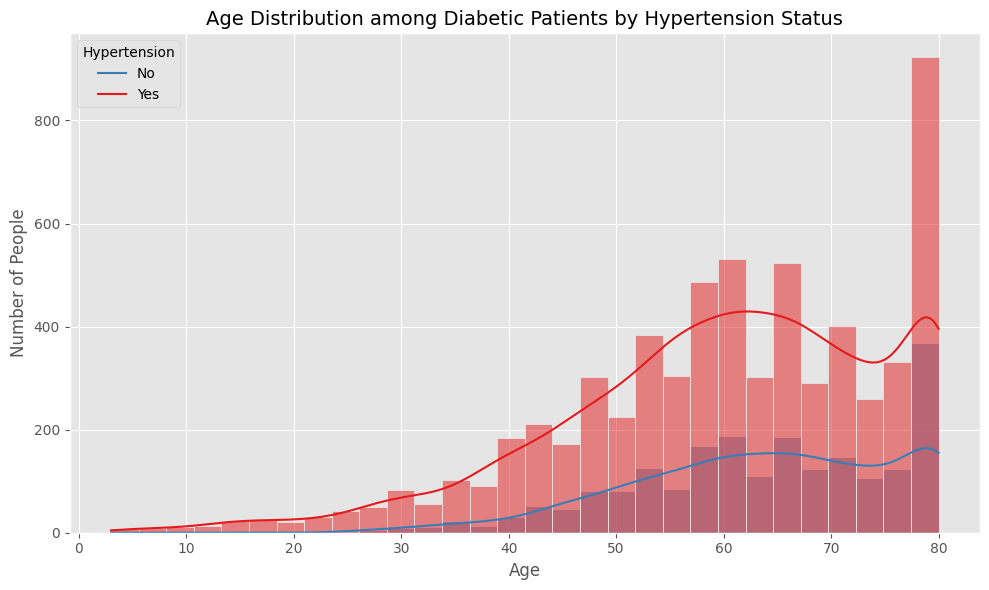

In [206]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter diabetic patients using query
diabetic_df = df.query("diabetes == 1")

# Set up the plot
plt.figure(figsize=(10, 6))
sns.histplot(data=diabetic_df, x='age', hue='hypertension', bins=30, kde=True, palette='Set1')

# Add labels and title
plt.title('Age Distribution among Diabetic Patients by Hypertension Status', fontsize=14)
plt.xlabel('Age')
plt.ylabel('Number of People')
plt.legend(title='Hypertension', labels=['No', 'Yes'])
plt.grid(True)
plt.tight_layout()
plt.show()


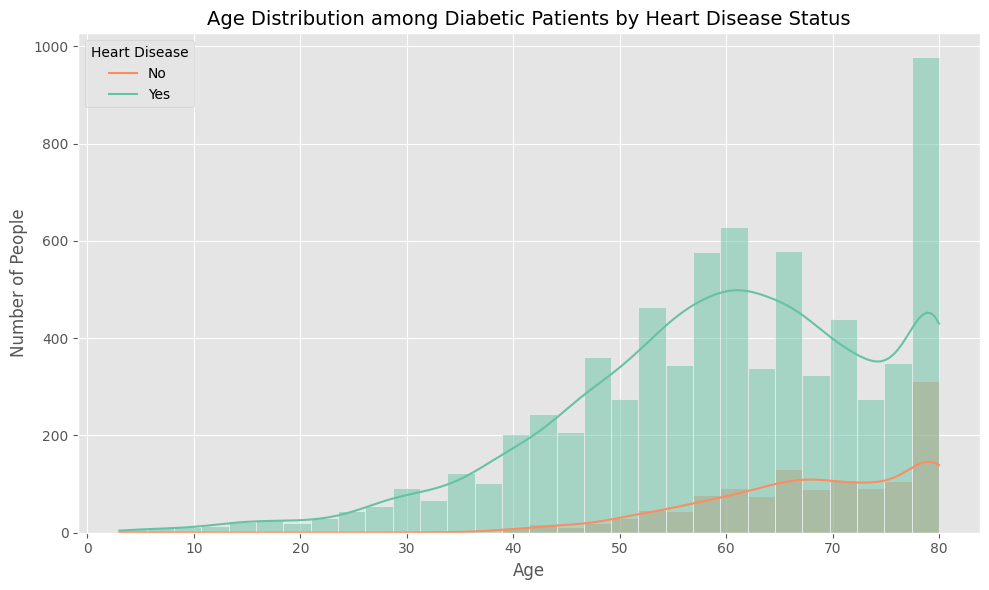

In [207]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter diabetic patients using query
diabetic_df = df.query("diabetes == 1")

# Set up the plot
plt.figure(figsize=(10, 6))
sns.histplot(data=diabetic_df, x='age', hue='heart_disease', bins=30, kde=True, palette='Set2')

# Add labels and title
plt.title('Age Distribution among Diabetic Patients by Heart Disease Status', fontsize=14)
plt.xlabel('Age')
plt.ylabel('Number of People')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.grid(True)
plt.tight_layout()
plt.show()


/tmp/ipython-input-208-147088053.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diabetic_df['combined_conditions'] = diabetic_df['hypertension'].astype(str) + "_" + diabetic_df['heart_disease'].astype(str)
/tmp/ipython-input-208-147088053.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diabetic_df['combined_conditions'] = diabetic_df['combined_conditions'].map(condition_labels)


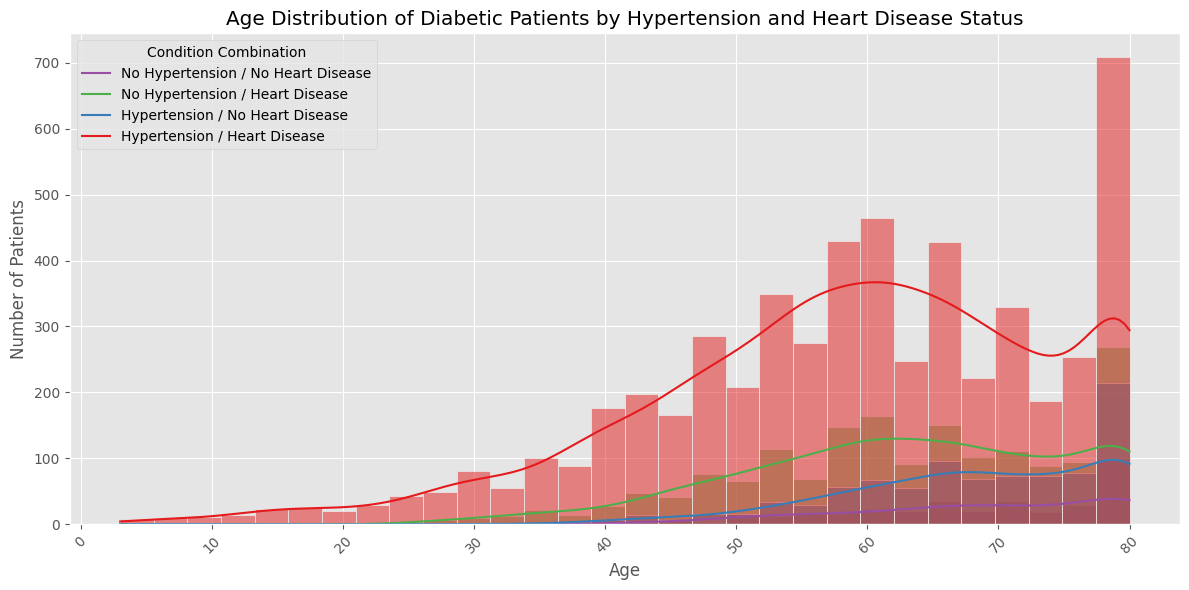

In [208]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter only diabetic patients
diabetic_df = df.query("diabetes == 1")

# Create a new column to combine hypertension and heart disease info
diabetic_df['combined_conditions'] = diabetic_df['hypertension'].astype(str) + "_" + diabetic_df['heart_disease'].astype(str)

# Map combined values to readable labels
condition_labels = {
    '0_0': 'No Hypertension / No Heart Disease',
    '0_1': 'No Hypertension / Heart Disease',
    '1_0': 'Hypertension / No Heart Disease',
    '1_1': 'Hypertension / Heart Disease'
}
diabetic_df['combined_conditions'] = diabetic_df['combined_conditions'].map(condition_labels)

# Plot the age distribution by combined conditions
plt.figure(figsize=(12, 6))
sns.histplot(data=diabetic_df, x='age', hue='combined_conditions', bins=30, kde=True, palette='Set1')

plt.title('Age Distribution of Diabetic Patients by Hypertension and Heart Disease Status')
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.xticks(rotation=45)
plt.legend(title='Condition Combination', labels=[
    'No Hypertension / No Heart Disease',
    'No Hypertension / Heart Disease',
    'Hypertension / No Heart Disease',
    'Hypertension / Heart Disease'
])
plt.grid(True)
plt.tight_layout()
plt.show()


In [209]:
df

,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,bmi_was_missing
0,80.0,0,1,never,25.190000,6.6,140,0,0
1,54.0,0,0,never,29.695824,6.6,80,0,1
2,28.0,0,0,never,27.331197,5.7,158,0,1
3,36.0,0,0,current,23.450000,5.0,155,0,0
4,76.0,1,1,current,20.140000,4.8,155,0,0
...,...,...,...,...,...,...,...,...,...
99994,36.0,0,0,not current,24.600000,4.8,145,0,0
99996,2.0,0,0,former,17.370000,6.5,100,0,0
99997,66.0,0,0,former,27.830000,5.7,155,0,0
99998,24.0,0,0,never,35.420000,4.0,100,0,0


**Now , To Deal With Numeric Attributes**

In [210]:
df['bmi'] = df['bmi'].apply(lambda x: 1 if 18.5 <= x <= 24.9 else 0)
# 1 = Normal BMI level
# 0 = Not Normal
df.head()

,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,bmi_was_missing
0,80.0,0,1,never,0,6.6,140,0,0
1,54.0,0,0,never,0,6.6,80,0,1
2,28.0,0,0,never,0,5.7,158,0,1
3,36.0,0,0,current,1,5.0,155,0,0
4,76.0,1,1,current,1,4.8,155,0,0


In [211]:
df['HbA1c_level'] = df['HbA1c_level'].apply(lambda x: 1 if 5.7 >= x else 0)
df.head()
# 1 = Normal
# 0 = Not Normal

,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,bmi_was_missing
0,80.0,0,1,never,0,0,140,0,0
1,54.0,0,0,never,0,0,80,0,1
2,28.0,0,0,never,0,1,158,0,1
3,36.0,0,0,current,1,1,155,0,0
4,76.0,1,1,current,1,1,155,0,0


In [212]:
df['blood_glucose_level'] = df['blood_glucose_level'].apply(lambda x: 1 if 140 >= x else 0)
df.head()
# 1 = Normal
# 0 = Abnormal

,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,bmi_was_missing
0,80.0,0,1,never,0,0,1,0,0
1,54.0,0,0,never,0,0,1,0,1
2,28.0,0,0,never,0,1,0,0,1
3,36.0,0,0,current,1,1,0,0,0
4,76.0,1,1,current,1,1,0,0,0


In [213]:
###################################################

In [214]:
df = df.drop('bmi_was_missing', axis=1)
from google.colab import files

 # Save DF to CSV
df.to_csv('edited_data.csv', index=False)

files.download('edited_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [215]:
df

,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,80.0,0,1,never,0,0,1,0
1,54.0,0,0,never,0,0,1,0
2,28.0,0,0,never,0,1,0,0
3,36.0,0,0,current,1,1,0,0
4,76.0,1,1,current,1,1,0,0
...,...,...,...,...,...,...,...,...
99994,36.0,0,0,not current,1,1,0,0
99996,2.0,0,0,former,0,0,1,0
99997,66.0,0,0,former,0,1,0,0
99998,24.0,0,0,never,0,1,1,0


In [216]:
df['diabetes'].value_counts()

,count
diabetes,
0,87664
1,8482


/tmp/ipython-input-217-28576953.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='diabetes', palette='Set2')


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

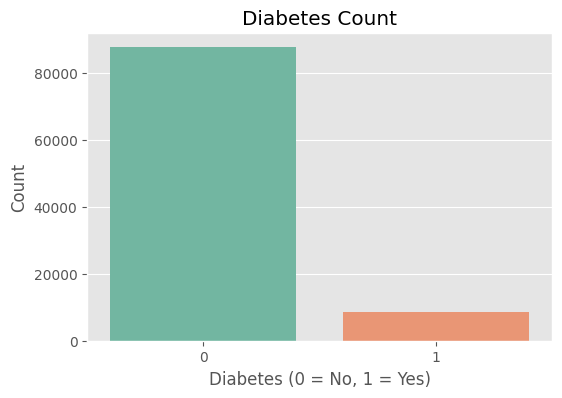

In [217]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='diabetes', palette='Set2')

plt.title('Diabetes Count')
plt.xlabel('Diabetes (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt

In [ ]:
# 1. Oversample using SMOTE 
# from imblearn.over_sampling import SMOTE
# smote = SMOTE()
# X_resampled, y_resampled = smote.fit_resample(X, y)

# 2. Or useing class weights 

df_new=pd.read_csv('/content/edited_data (1).csv')
df_new.head()


# from sklearn.ensemble import RandomForestClassifier
# clf2 = RandomForestClassifier(class_weight='balanced')
# clf2.fit(X_train, y_train)

,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,80.0,0,1,never,0,0,1,0
1,54.0,0,0,never,0,0,1,0
2,28.0,0,0,never,0,1,0,0
3,36.0,0,0,current,1,1,0,0
4,76.0,1,1,current,1,1,0,0


In [ ]:
#Balancing the data
from imblearn.over_sampling import SMOTE # For handling Imbalanced data
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

np.random.seed(42)

# encode the 'smoking_history' column
X = pd.get_dummies(df_new.drop('diabetes', axis=1), columns=['smoking_history'], drop_first=False)
y = df_new['diabetes']


#split the data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)





# Apply SMOTE only to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check new class distribution
from collections import Counter
print("Before:", Counter(y_train))
print("After :", Counter(y_train_resampled))







#initiate LinearSVC
clf = LinearSVC()
clf.fit(X_train_resampled,y_train_resampled)

#evaluate our model
print(clf.score(X_test,y_test))

Before: Counter({0: 70155, 1: 6761})
After : Counter({0: 70155, 1: 70155})
0.8017160686427457


In [221]:
X_train

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
45703,35.0,0,0,0,0,0,False,False,False,False,True
31187,0.4,0,0,0,1,1,False,False,True,False,False
92558,60.0,0,0,1,0,1,False,True,False,False,False
92138,66.0,0,0,0,0,1,False,False,False,True,False
37029,48.0,0,0,1,1,0,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
6265,12.0,0,0,1,0,0,False,False,True,False,False
54886,62.0,0,0,0,1,0,False,False,True,False,False
76820,56.0,1,0,0,0,0,False,False,False,True,False
860,37.0,0,0,0,0,0,False,False,False,True,False


In [222]:
X_train_resampled

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,35.0,0,0,0,0,0,False,False,False,False,True
1,0.4,0,0,0,1,1,False,False,True,False,False
2,60.0,0,0,1,0,1,False,True,False,False,False
3,66.0,0,0,0,0,1,False,False,False,True,False
4,48.0,0,0,1,1,0,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
140305,54.0,0,0,0,0,0,False,False,False,True,False
140306,70.0,0,0,0,0,1,False,False,False,True,False
140307,74.0,0,0,0,0,0,True,False,False,False,False
140308,68.0,0,0,0,0,0,True,False,False,False,False


In [223]:
y_train_resampled

,diabetes
0,0
1,0
2,0
3,0
4,0
...,...
140305,1
140306,1
140307,1
140308,1


In [224]:
y_train_resampled.value_counts()

,count
diabetes,
0,70155
1,70155
